# **TA #8 - Python version**

## Foundation of Econometrics - DSDM 2025-2026

**Lucia Sauer**

**Contact:** [lucia.sauer@bse.eu](mailto:lucia.sauer@bse.eu)

In this notebook we will review:

- 


In [214]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy import stats
import seaborn as sns
from linearmodels.iv import IV2SLS

#set seaborn style talk
sns.set_context("talk")


## **Mortality Risk and MLDA**
---

We are gonna use the dataset published in **Mastering Metrics** book by Angrist and Pischke to study the effect of Minimum Legal Drinking Age (MLDA) on mortality rates. 

The dataset can be found [here](https://www.masteringmetrics.com/resources/).

Some definitions:

- **Running variable**: the variable that determines treatment assignment. In our case, it is age.
- **Cutoff**: the value of the running variable at which treatment assignment changes. In our case, it is 21 years.
- **Treatment**: the intervention or condition being studied. In our case, it is legal
    drinking status (legal vs illegal).
- **Outcome variable**: the variable that measures the effect of the treatment. In our case, it is mortality rate.

In [215]:
df = pd.read_stata('MLDA/AEJfigs.dta')
# select relevant columns
df

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825401,91.706146,16.617590,16.738131,76.207817,74.968010,0.639138,0.794344,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100739,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633888,3.236511,3.470022,8.655786,8.530174
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233238,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681
3,19.315069,88.427757,92.202141,16.101770,17.272680,72.325981,74.929466,0.867308,0.915115,16.742825,16.261148,11.275010,11.596655,32.278957,34.256302,3.280689,3.514980,8.258285,8.785728
4,19.397261,88.704941,92.342918,17.363520,17.442156,71.341415,74.900757,1.019163,0.949407,14.947726,16.265511,10.984314,11.598189,32.650967,34.062588,3.548198,3.538755,8.417533,8.899288
5,19.479452,90.191788,92.471344,17.872105,17.607254,72.319679,74.864090,1.171322,0.980701,15.642815,16.275990,12.166634,11.599731,32.721443,33.865582,3.211689,3.563399,7.972546,9.003332
6,19.561644,96.220306,92.587387,16.414942,17.767965,79.805367,74.819420,0.869916,1.008988,16.263653,16.292604,12.405763,11.601281,36.385197,33.665272,3.857890,3.588913,10.287705,9.097831
7,19.643835,89.615555,92.691017,15.977087,17.924273,73.638466,74.766747,1.097951,1.034261,15.825645,16.315371,10.979514,11.602839,34.187935,33.461647,3.483156,3.615300,8.670031,9.182756
8,19.726027,93.381699,92.782196,17.433271,18.076166,75.948425,74.706024,1.174851,1.056508,16.789000,16.344309,11.900103,11.604405,31.910467,33.254696,4.055130,3.642563,10.763150,9.258080
9,19.808220,90.857956,92.860870,18.285400,18.223631,72.572556,74.637245,0.948413,1.075722,16.616194,16.379436,11.570638,11.605980,30.576832,33.044415,3.566033,3.670704,9.863494,9.323772



In this section, we reproduce the empirical strategy from *Mastering 'Metrics'* where the authors estimate the causal effect of the Minimum Legal Drinking Age (MLDA=21) on mortality rates. This design uses a sharp Regression Discontinuity based on the age threshold.


### Linear RD Specification

We begin by fitting a linear RD model, first with a common trend and then allowing for different linear slopes on each side of the cutoff.
$$\bar{M} = \alpha + \beta_1 \text{age} + \beta_2 \text{over21} + \beta_3 \text{age} \cdot \text{over21} +  \epsilon$$

In [216]:
# Create running variable centered at 21
df["age"] = df["agecell"] - 21
df["over21"] = (df["agecell"] >= 21).astype(int)

# RD regression with different slopes on each side
model = smf.ols("all ~ age + over21 + age*over21", data=df).fit()
# Fitted values for visualization
df["fit"] = model.fittedvalues
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     29.47
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.33e-10
Time:                        01:15:08   Log-Likelihood:                -105.64
No. Observations:                  48   AIC:                             219.3
Df Residuals:                      44   BIC:                             226.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.6184      0.932    100.399      0.0

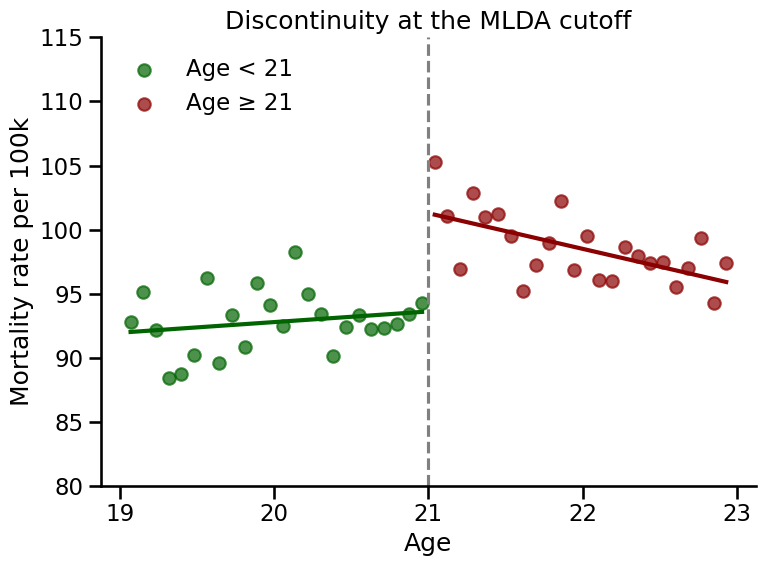

In [217]:
fig, ax = plt.subplots(figsize=(8,6))

# Raw data
# Scatter separated by treatment status
ax.scatter(df[df["agecell"] < 21]["agecell"],
           df[df["agecell"] < 21]["all"],
           alpha=0.7, color="darkgreen", label="Age < 21")

ax.scatter(df[df["agecell"] >= 21]["agecell"],
           df[df["agecell"] >= 21]["all"],
           alpha=0.7, color="darkred", label="Age ≥ 21")


# Fitted RD lines
ax.plot(df[df["agecell"] < 21]["agecell"],
        df[df["agecell"] < 21]["fit"],
        linewidth=3, color="darkgreen")

ax.plot(df[df["agecell"] >= 21]["agecell"],
        df[df["agecell"] >= 21]["fit"],
        linewidth=3, color="darkred")

# RD cutoff
ax.axvline(21, linestyle="--", color="grey")

ax.set_xlabel("Age")
ax.set_ylabel("Mortality rate per 100k")
ax.set_title("Discontinuity at the MLDA cutoff")

# Cleaner style
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylim(80,115)

plt.legend(frameon=False, loc="upper left")
plt.tight_layout()
plt.show()


### Quadratic RD Specification

Now we allow richer functional form, including a quadratic polynomial and different shapes on each side of the cutoff.


In [218]:
df["age2"] = df["age"]**2

# RD regression with different slopes on each side
model_q = smf.ols("all ~ age + age2 + over21 + age*over21 + age2*over21", data=df).fit()
# Fitted values for visualization
df["fit_q"] = model_q.fittedvalues
print(model_q.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     18.02
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.62e-09
Time:                        01:15:08   Log-Likelihood:                -104.57
No. Observations:                  48   AIC:                             221.1
Df Residuals:                      42   BIC:                             232.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      93.0729      1.404     66.301      

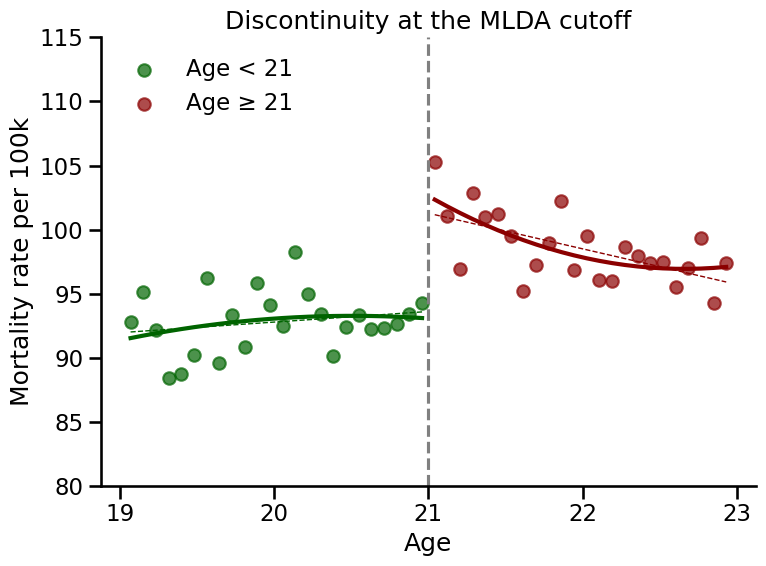

In [219]:
fig, ax = plt.subplots(figsize=(8,6))

# Raw data
# Scatter separated by treatment status
ax.scatter(df[df["agecell"] < 21]["agecell"],
           df[df["agecell"] < 21]["all"],
           alpha=0.7, color="darkgreen", label="Age < 21")

ax.scatter(df[df["agecell"] >= 21]["agecell"],
           df[df["agecell"] >= 21]["all"],
           alpha=0.7, color="darkred", label="Age ≥ 21")


# Fitted RD lines
ax.plot(df[df["agecell"] < 21]["agecell"],
        df[df["agecell"] < 21]["fit_q"],
        linewidth=3, color="darkgreen")

ax.plot(df[df["agecell"] >= 21]["agecell"],
        df[df["agecell"] >= 21]["fit_q"],
        linewidth=3, color="darkred")

# Fitted RD lines
ax.plot(df[df["agecell"] < 21]["agecell"],
        df[df["agecell"] < 21]["fit"],
        linewidth=1, color="darkgreen", linestyle="--")

ax.plot(df[df["agecell"] >= 21]["agecell"],
        df[df["agecell"] >= 21]["fit"],
        linewidth=1, color="darkred", linestyle="--")


# RD cutoff
ax.axvline(21, linestyle="--", color="grey")

ax.set_xlabel("Age")
ax.set_ylabel("Mortality rate per 100k")
ax.set_title("Discontinuity at the MLDA cutoff")

# Cleaner style
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylim(80,115)

plt.legend(frameon=False, loc="upper left")
plt.tight_layout()
plt.show()


### Cause-Specific Mortality RD Estimates

We focus on specific causes of death such as motor vehicle accidents, suicides, and internal causes.


In [220]:
# Linear fit for MVA
mva_lin = smf.ols("mva ~ age + over21 + over21*age", data=df).fit()
df["mvafitlin"] = mva_lin.fittedvalues

# Quadratic fit for MVA
mva_qi = smf.ols("mva ~ age + age2 + over21 + over21*age + over21*age2", data=df).fit()
df["mvafitqi"] = mva_qi.fittedvalues

# Linear fit for Suicide
s_lin = smf.ols("suicide ~ age + over21 + over21*age", data=df).fit()
df["sufitlin"] = s_lin.fittedvalues

# Internal causes
int_lin = smf.ols("internal ~ age + over21 + over21*age", data=df).fit()
df["intfitlin"] = int_lin.fittedvalues


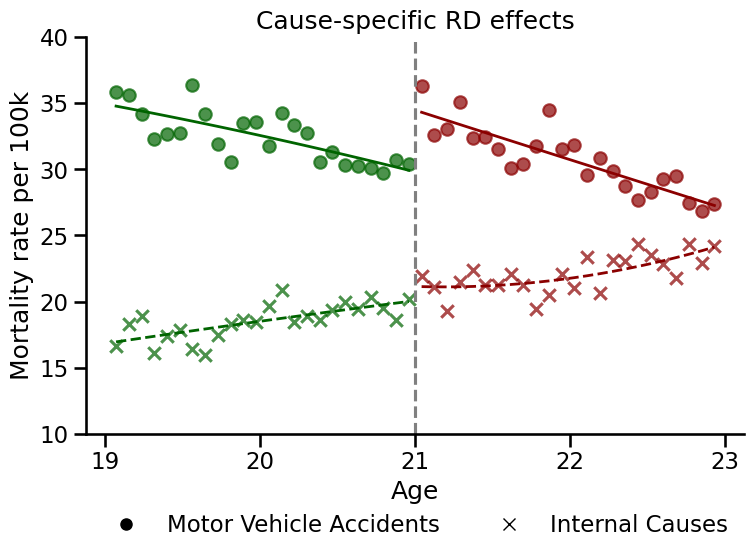

In [221]:
# Estimated curve: Quadratic RD for MVA + Internal
mva_qi = smf.ols("mva ~ age + age2 + over21 + over21*age + over21*age2", data=df).fit()
int_qi = smf.ols("internal ~ age + age2 + over21 + over21*age + over21*age2", data=df).fit()

df["mvafitqi"] = mva_qi.fittedvalues
df["intfitqi"] = int_qi.fittedvalues

# Plot
fig, ax = plt.subplots(figsize=(8,6))

# Scatter 
#ax.scatter(df["agecell"], df["mva"], alpha=0.6, label="Motor Vehicle Deaths")
ax.scatter(df[df["agecell"] < 21]["agecell"],
           df[df["agecell"] < 21]["mva"],
           alpha=0.7, color="darkgreen", label="Motor Vehicle Deaths")

ax.scatter(df[df["agecell"] >= 21]["agecell"],
           df[df["agecell"] >= 21]["mva"],
           alpha=0.7, color="darkred", label="Motor Vehicle Deaths")



#ax.scatter(df["agecell"], df["internal"], alpha=0.6, label="Internal Causes", marker="x")

ax.scatter(df[df["agecell"] < 21]["agecell"],
           df[df["agecell"] < 21]["internal"],
           alpha=0.7, color="darkgreen", label="Internal Causes", marker="x")

ax.scatter(df[df["agecell"] >= 21]["agecell"],
           df[df["agecell"] >= 21]["internal"],
           alpha=0.7, color="darkred", label="Internal Causes", marker="x")

# Smoothed RD lines (quadratic on each side)
left = df[df["agecell"] < 21]
right = df[df["agecell"] >= 21]

ax.plot(left["agecell"], left["mvafitqi"], linewidth=2, color="darkgreen")
ax.plot(right["agecell"], right["mvafitqi"], linewidth=2, color="darkred")

ax.plot(left["agecell"], left["intfitqi"], linewidth=2, linestyle="--", color="darkgreen")
ax.plot(right["agecell"], right["intfitqi"], linewidth=2, linestyle="--", color="darkred")

# Vertical RD cutoff
ax.axvline(21, color="grey", linestyle="--")

ax.set_xlabel("Age")
ax.set_ylabel("Mortality rate per 100k")
ax.set_title("Cause-specific RD effects")

# Cleaner style
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_ylim(10,40)


# Custom legend markers
mva_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                           markersize=8, label='Motor Vehicle Accidents')
internal_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                                markersize=8, label='Internal Causes')

# Legend below the x-axis, centered
ax.legend(handles=[mva_marker, internal_marker],
          loc='upper center',
          bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False)

plt.tight_layout()
plt.show()


### Table 4.1 – RD Effects on Various Causes

We now estimate the discontinuity parameter (`over21`) under four model specifications:
1. Linear global
2. Quadratic global
3. Linear with local bandwidth (20–22)
4. Quadratic with local bandwidth


In [222]:
causes = {
    "all": "All Causes",
    "mva": "Motor Vehicle",
    "suicide": "Suicide",
    "homicide": "Homicide",
   
    "internal": "Internal Causes",
    "alcohol": "Alcohol"
}

rows = []

for var, label in causes.items():
    # Model 1: Linear (Global)
    m1 = smf.ols(f"{var} ~ age + over21", data=df).fit()
    # Model 2: Quadratic (Global)
    m2 = smf.ols(f"{var} ~ age + age2 + over21 + over21*age + over21*age2", data=df).fit()
    
    # Local (20–22)
    subset = df[(df["agecell"] >= 20) & (df["agecell"] <= 22)]
    m3 = smf.ols(f"{var} ~ age + over21 + over21*age", data=subset).fit()
    m4 = smf.ols(f"{var} ~ age + age2 + over21 + over21*age + over21*age2", data=subset).fit()
    
    rows.append({
        "Cause": label,
        "Linear (Global)": f"{m1.params['over21']:.2f} ({m1.bse['over21']:.2f})",
        "Quadratic (Global)": f"{m2.params['over21']:.2f} ({m2.bse['over21']:.2f})",
        "Linear (20-22)": f"{m3.params['over21']:.2f} ({m3.bse['over21']:.2f})",
        "Quadratic (20-22)": f"{m4.params['over21']:.2f} ({m4.bse['over21']:.2f})"
    })

table41 = pd.DataFrame(rows)

* 🚗 Alcohol induces risky behavior → motor vehicle accidents
* 🧨 Alcohol lowers inhibitions → suicides and other external injuries
* 👊 Alcohol **does not** cause internal diseases in healthy young adults → near zero effect on internal causes

In [223]:
styled_table41 = (
    table41.style
    .set_caption("Table 4.1 — RD Estimates of MLDA on Mortality")
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('font-weight', 'bold')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '14pt'), ('font-weight', 'bold')]}
    ])
    .background_gradient(cmap="Greys", axis=None)
)

styled_table41


,Cause,Linear (Global),Quadratic (Global),Linear (20-22),Quadratic (20-22)
0,All Causes,7.66 (1.44),9.55 (1.99),9.75 (1.94),9.61 (2.89)
1,Motor Vehicle,4.53 (0.77),4.66 (1.15),4.76 (1.12),5.89 (1.56)
2,Suicide,1.79 (0.45),1.81 (0.70),1.72 (0.71),1.30 (1.13)
3,Homicide,0.10 (0.39),0.20 (0.52),0.16 (0.52),-0.45 (0.79)
4,Internal Causes,0.39 (0.60),1.07 (0.91),1.69 (0.76),1.25 (1.20)
5,Alcohol,0.44 (0.16),0.80 (0.22),0.74 (0.23),1.03 (0.33)


## **Uber Surge Pricing**
---

- In the following application we will study the effect of Uber's surge pricing on the number of drivers available in a given area.
- Surge pricing is a dynamic pricing strategy used by ride-sharing companies like Uber to adjust fares based on real-time demand and supply conditions, to incentivize more drivers to get on the road during peak times and rebalance the market.

Since data is not possible to obtain, we will simulate a dataset to illustrate the RD design.

Some definitions:

- **Running variable**: it is the balancing score that determines the demand for rides.
- **Cutoff**: it is the demand threshold for surge pricing.
- **Treatment**: it is the implementation of surge pricing.
- **Outcome variable**: it is the number of drivers available.



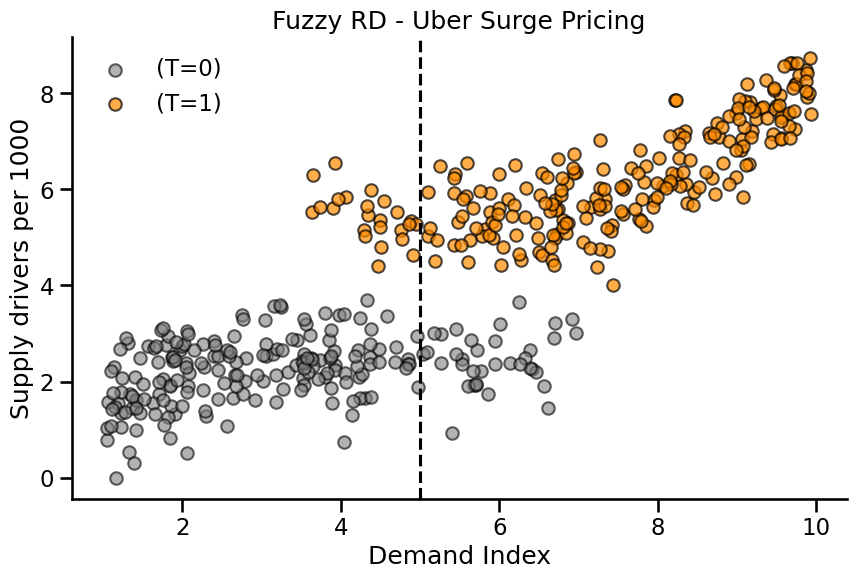

In [224]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# 1. Parameters
# -----------------------------
n_points = 500
cutoff = 5
jump = 3      
sigma = 0.6     

# -----------------------------
# 2. Simulation running variable Z
# -----------------------------
Z = np.random.uniform(1, 10, size=n_points)

# -----------------------------
# 3. Treatment probability (fuzzy)
# -----------------------------
# Sigmoid function to smoothly increase probability around the cutoff
def sigmoid_prob(x, cutoff, min_p=0.1, max_p=0.8, steepness=1.5):
    return min_p + (max_p - min_p) / (1 + np.exp(-steepness*(x - cutoff)))

prob_T = sigmoid_prob(Z, cutoff)
T = np.random.binomial(1, prob_T)

# -----------------------------
# 4. Outcome Y 
# -----------------------------

Y_base = np.sin(Z/1.5) + 0.5*Z
Y = Y_base + jump*T + np.random.normal(0, sigma, size=n_points)

# -----------------------------
# 5. Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(Z[(T==0) & (Z<7)], Y[(T==0) & (Z<7)], color='gray', alpha=0.6, edgecolor='k', label='(T=0)')
plt.scatter(Z[(T==1) & (Z>3.5)], Y[(T==1) & (Z>3.5)], color='darkorange', alpha=0.7, edgecolor='k', label='(T=1)')
plt.axvline(cutoff, color='black', linestyle='--')
plt.xlabel("Demand Index")
plt.ylabel("Supply drivers per 1000")
plt.title("Fuzzy RD - Uber Surge Pricing")
# Cleaner style
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend(frameon=False)
plt.show()

In [225]:
df = pd.DataFrame({
    "Z": Z,
    "T": T,
    "Y": Y
})


/var/folders/fz/1mp_qssx1z546qc9z63nq3rm0000gn/T/ipykernel_96927/252370037.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treat_prob = df.groupby("bin")["T"].mean()


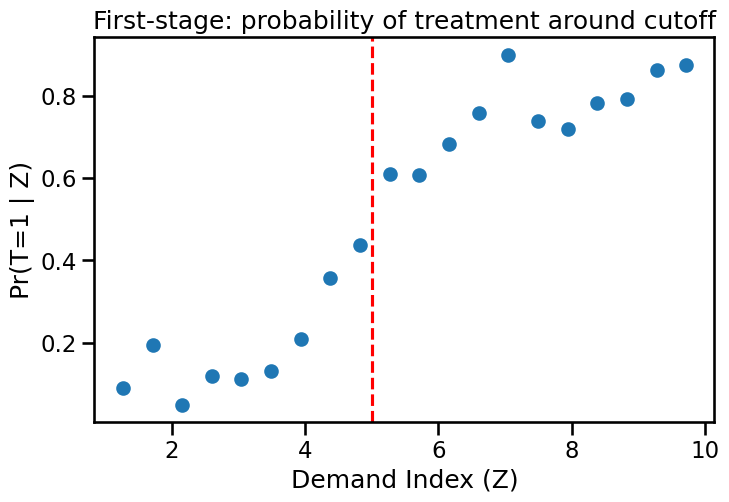

In [226]:
df["bin"] = pd.cut(df["Z"], bins=20)
treat_prob = df.groupby("bin")["T"].mean()
bin_centers = [b.mid for b in treat_prob.index]

plt.figure(figsize=(8,5))
plt.scatter(bin_centers, treat_prob)
plt.axvline(cutoff, color="red", linestyle="--")
plt.xlabel("Demand Index (Z)")
plt.ylabel("Pr(T=1 | Z)")
plt.title("First-stage: probability of treatment around cutoff")
plt.show()


- Orange dots: drivers that receive surge price. 
- Grey dots: drivers that do not receive surge price.

In [227]:
cutoff = 5

# -----------------------------
# 1. create instrument
# -----------------------------
df['Instr'] = (df['Z'] >= cutoff).astype(int)

# Center running variable at the cutoff
df['Z_centered'] = df['Z'] - cutoff

# -----------------------------
# 2. Local RD
# -----------------------------
bandwidth = 2  # ej. ±2 units around cutoff
df_local = df[np.abs(df['Z_centered']) <= bandwidth]

# -----------------------------
# 3. Specify model IV2SLS
# -----------------------------
# exogenous: constant + running variable centered
exog = sm.add_constant(df_local['Z_centered'])

# Endogenous: treatment T
endog = df_local['T']

# Instrument: crossing the cutoff
instr = df_local['Instr']

iv_model = IV2SLS(
    dependent=df_local['Y'],
    exog=exog,
    endog=endog,
    instruments=instr
)

# -----------------------------
# 4. Results
# -----------------------------
result = iv_model.fit(cov_type='robust')
print(result.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                      Y   R-squared:                      0.6899
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6870
No. Observations:                 217   F-statistic:                    172.42
Date:                Thu, Nov 20 2025   P-value (F-stat)                0.0000
Time:                        01:15:08   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          3.1996     5.7617     0.5553     0.5787     -8.0932      14.492
Z_centered     0.3350     2.5940     0.1291     0.89

### Wald Estimate

$$\alpha_{FRD} = \frac{lim_{Z \to 5^{+}} E[Y|Z=z_0] - lim_{Z \to 5^{-}} E[Y|Z=z_0]}{lim_{Z \to 5^{+}}E[T|Z=z_0] - lim_{Z \to 5^{-}}E[T|Z=z_0]} = \frac{\alpha_{SRD}}{\delta}$$

where $\delta$ is the proportion of drivers that receive surge pricing when demand crosses the threshold (compliers)

In [228]:
fs = smf.ols("T ~ Instr + Z_centered", data=df_local).fit()

ss = smf.ols("Y ~ Instr + Z_centered", data=df_local).fit()

pi1 = fs.params["Instr"]
tau = ss.params["Instr"]
alpha_FRD = tau / pi1
print('\n\n')
print('Wald estimate',alpha_FRD)




Wald estimate 1.4076916397424653
